In [14]:
import numpy as np 
import pandas as pd
import seaborn as sns
import pickle
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
import warnings

## Load Datasets 

In [2]:
Data = pd.read_csv("loan.csv")

In [3]:
Data

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32581,32577.0,57,53000,MORTGAGE,1.0,PERSONAL,C,"£5,800.00",13.16,7,NaN,30,NO DEFAULT
32582,32578.0,54,120000,MORTGAGE,4.0,PERSONAL,A,"£17,625.00",7.49,4,NaN,19,NO DEFAULT
32583,32579.0,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,"£35,000.00",10.99,5,N,28,DEFAULT
32584,32580.0,56,150000,MORTGAGE,5.0,PERSONAL,B,"£15,000.00",11.48,6,NaN,26,NO DEFAULT


In [6]:
round((Data.isnull().sum()/len(Data))*100)

customer_id             0.0
customer_age            0.0
customer_income         0.0
home_ownership          0.0
employment_duration     3.0
loan_intent             0.0
loan_grade              0.0
loan_amnt               0.0
loan_int_rate          10.0
term_years              0.0
historical_default     64.0
cred_hist_length        0.0
Current_loan_status     0.0
dtype: float64

In [10]:
Data.drop(columns = "historical_default", inplace=True)

In [11]:
Data.drop(columns = "customer_id",inplace=True)

In [12]:
Data

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,cred_hist_length,Current_loan_status
0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,3,DEFAULT
1,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,2,NO DEFAULT
2,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,3,DEFAULT
3,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,2,DEFAULT
4,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,4,DEFAULT
...,...,...,...,...,...,...,...,...,...,...,...
32581,57,53000,MORTGAGE,1.0,PERSONAL,C,"£5,800.00",13.16,7,30,NO DEFAULT
32582,54,120000,MORTGAGE,4.0,PERSONAL,A,"£17,625.00",7.49,4,19,NO DEFAULT
32583,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,"£35,000.00",10.99,5,28,DEFAULT
32584,56,150000,MORTGAGE,5.0,PERSONAL,B,"£15,000.00",11.48,6,26,NO DEFAULT


In [13]:
round((Data.isnull().sum()/len(Data))*100)

customer_age            0.0
customer_income         0.0
home_ownership          0.0
employment_duration     3.0
loan_intent             0.0
loan_grade              0.0
loan_amnt               0.0
loan_int_rate          10.0
term_years              0.0
cred_hist_length        0.0
Current_loan_status     0.0
dtype: float64

In [15]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_age         32586 non-null  int64  
 1   customer_income      32586 non-null  object 
 2   home_ownership       32586 non-null  object 
 3   employment_duration  31691 non-null  float64
 4   loan_intent          32586 non-null  object 
 5   loan_grade           32586 non-null  object 
 6   loan_amnt            32585 non-null  object 
 7   loan_int_rate        29470 non-null  float64
 8   term_years           32586 non-null  int64  
 9   cred_hist_length     32586 non-null  int64  
 10  Current_loan_status  32582 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 2.7+ MB


In [19]:
Data.duplicated().sum()

172

In [20]:
 Data.drop_duplicates(inplace=True)

In [22]:
Data['loan_amnt'] =Data['loan_amnt'].str.replace("£","")
Data['loan_amnt'] =Data['loan_amnt'].str.replace(",","")
Data['loan_amnt']=Data['loan_amnt'].astype('float64')

In [24]:
Data['customer_income']=Data['customer_income'].str.replace(",","")
Data['customer_income']=Data['customer_income'].astype('int64')

In [25]:
numerical_impute = SimpleImputer(strategy='median')


In [26]:
numerical_columns = Data.select_dtypes(include=['float64','int64']).columns
categorical_columns = Data.select_dtypes(include=['object']).columns

In [27]:
numerical_columns

Index(['customer_age', 'customer_income', 'employment_duration', 'loan_amnt',
       'loan_int_rate', 'term_years', 'cred_hist_length'],
      dtype='object')

In [28]:
categorical_columns

Index(['home_ownership', 'loan_intent', 'loan_grade', 'Current_loan_status'], dtype='object')

In [30]:
for col in numerical_columns:
  Data[col] = numerical_impute.fit_transform(Data[[col]])

In [31]:
round((Data.isnull().sum()/len(Data))*100)

customer_age           0.0
customer_income        0.0
home_ownership         0.0
employment_duration    0.0
loan_intent            0.0
loan_grade             0.0
loan_amnt              0.0
loan_int_rate          0.0
term_years             0.0
cred_hist_length       0.0
Current_loan_status    0.0
dtype: float64

In [63]:
df = Data.copy()

In [64]:
df.head()

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,cred_hist_length,Current_loan_status
0,22.0,59000.0,RENT,123.0,PERSONAL,C,35000.0,16.02,10.0,3.0,DEFAULT
1,21.0,9600.0,OWN,5.0,EDUCATION,A,1000.0,11.14,1.0,2.0,NO DEFAULT
2,25.0,9600.0,MORTGAGE,1.0,MEDICAL,B,5500.0,12.87,5.0,3.0,DEFAULT
3,23.0,65500.0,RENT,4.0,MEDICAL,B,35000.0,15.23,10.0,2.0,DEFAULT
4,24.0,54400.0,RENT,8.0,MEDICAL,B,35000.0,14.27,10.0,4.0,DEFAULT


In [65]:
df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [66]:
df['home_ownership'] = df['home_ownership'].map({ 'RENT' : 0, 'OWN':1, 'MORTGAGE': 2,'OTHER':3 })

In [67]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [68]:
df['loan_intent'] = df['loan_intent'].map({ 'PERSONAL' : 0, 'EDUCATION':1, 'MEDICAL': 2, 'VENTURE':3, 'HOMEIMPROVEMENT': 4, 'DEBTCONSOLIDATION':5})

In [69]:
df['loan_grade'].unique()

array(['C', 'A', 'B', 'D', 'E'], dtype=object)

In [70]:
df['loan_grade'] = df['loan_grade'].map({ 'A' : 0, 'B':1, 'C': 2, 'D':3, 'E': 4})

In [71]:
df['Current_loan_status'].unique()

array(['DEFAULT', 'NO DEFAULT', nan], dtype=object)

In [72]:
df['Current_loan_status'] = df['Current_loan_status'].map({ 'DEFAULT' : 0, 'NO DEFAULT':1})

In [59]:
integer = ["customer_age", "customer_income","employment_duration", "loan_amnt","term_years","Current_loan_status"]

In [73]:
df[integer] = df[integer].astype('int64')

In [74]:
df.isnull().sum()

customer_age           0
customer_income        0
home_ownership         0
employment_duration    0
loan_intent            0
loan_grade             0
loan_amnt              0
loan_int_rate          0
term_years             0
cred_hist_length       0
Current_loan_status    4
dtype: int64

In [79]:
df['Current_loan_status'].isnull().sum()

4

In [80]:
df['Current_loan_status'] = numerical_impute.fit_transform(df[["Current_loan_status"]])

In [81]:
df.isnull().sum()

customer_age           0
customer_income        0
home_ownership         0
employment_duration    0
loan_intent            0
loan_grade             0
loan_amnt              0
loan_int_rate          0
term_years             0
cred_hist_length       0
Current_loan_status    0
dtype: int64

In [83]:
X = df.drop(columns=['Current_loan_status'])
y = df['Current_loan_status']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [91]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000)

In [92]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [93]:
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score(y_test,y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", round(roc_auc,2))
print("accuracy : " + str(round(accuracy,2) * 100) + " %")

Confusion Matrix:
 [[ 524  806]
 [ 233 4920]]
ROC AUC Score: 0.83
accuracy : 84.0 %


<Axes: >

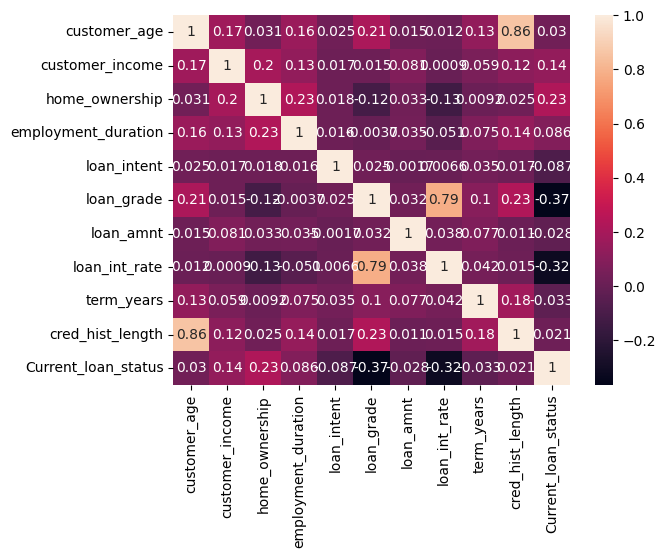

In [94]:
sns.heatmap(df.corr(), annot=True)

In [95]:
import pickle
#pickle.dump(df,open("df.pkl","wb"))
#pickle.dump(model,open('model.pkl','wb'))
pickle_out = open("model.pkl", "wb")
pickle.dump(model,pickle_out)
pickle_out.close()

In [96]:
 df.to_csv('loany.csv')